In [120]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def inset_plot(width, height,text,fontsize,ax):
    """
    plot a inset at the bottom left corner with 0 padding
    
    Parameters:
    ----------
    width: float
        the ratio of inset width w.r.t the parent axe's x axis
    
    height: float
        the ratio of inset height w.r.t the parent axe's y axis
    
    text: str
        the text displayed at the center of the inset
    
    fontsize: float
    
    ax: plt.ax
        the ax the inset will be added to
    """
    width='{}%'.format(width*100)
    height='{}%'.format(height*100)
    
    axins = inset_axes(ax, width=width, height=height, loc=3, borderpad=0)
    axins.tick_params(labelleft=False, labelbottom=False, length=0)
    axins.text(0.5,0.5,text,size=fontsize, ha='center',va='center')

In [172]:
# 1d spec data
flux1d=[]
wl1d=[]
with open('normalized.txt','r') as ns:
    for line in ns.readlines():
        w,f=line.strip(' \n').split()
        flux1d.append(float(f))
        wl1d.append(float(w))

flux1d=np.array(flux1d)
wl1d=np.array(wl1d)

In [193]:
z=1.859
## for Fe II
line = 2344
c = 299792.458 # km/s
def cut_data(line, z, limit, wl1d, fl1d):
    """
    line: angstrom
    limit: +- km/s
    """
    global c
    wl1d = wl1d / (1+z)
    veloes = (wl1d-line) * c /line
    idx500up = np.where(veloes > 0-limit)[0]
    v500up, f500up = veloes[idx500up], fl1d[idx500up]
    idx500lo = np.where(v500up < limit)[0]
    v500, f500 = v500up[idx500lo], f500up[idx500lo]
    
    return v500, f500

In [206]:
# read lines and their wavelengthes from file
lines={}
with open('lines.txt','r') as lf:
    for line in lf.readlines():
        if line.strip(' \n') == '': continue
        lamb, linename = line.strip(' \n').split()
        linename = linename.split('(')[0]
        I_idx = linename.find('I')
        if I_idx != -1:
            ele = linename[:I_idx]
            lev = linename[I_idx:]
        else:
            ele = linename
            lev = ''
        lines[float(lamb)]='{} {}'.format(ele,lev)

In [223]:
list(lines.keys())[np.argsort(np.abs(np.array(list(lines.keys())) - 1215))[0]]

1215.67

In [227]:
# lines you want to draw
linelist=[1302.17,1670.79,1854.7,2796.4]

(-400.0, 300.0)

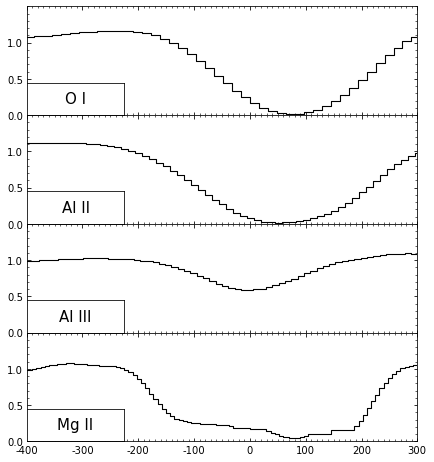

In [228]:
nsubs=len(linelist)
fig, axes = plt.subplots(nsubs,1,sharex=True, figsize=(7,2*nsubs))
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.direction'] = 'in' # y轴刻度朝里
plt.rcParams['xtick.direction'] = 'in' # x轴刻度朝里
fig.subplots_adjust(hspace=0)
for idx,ax in enumerate(axes):
    ax.set_ylim(0.0,1.5)
    ax.yaxis.set_major_locator(MultipleLocator(0.5)) # 设置主刻度为0.5的倍数
    ax.yaxis.set_major_formatter('{x:.1f}') # 主刻度坐标显示的格式:一位小数
    # For the minor ticks, use no labels; default NullFormatter.
    ax.yaxis.set_minor_locator(MultipleLocator(0.1)) # 副刻度为0.1的倍数,默认不显示副刻度坐标

    ax.xaxis.set_major_locator(MultipleLocator(100))
    ax.xaxis.set_major_formatter('{x:.0f}')
    # For the minor ticks, use no labels; default NullFormatter.
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_yticks([0.0,0.5,1.0])
    ax.set_yticklabels(['0.0','0.5','1.0'])
    #inset_plot(0.25,0.3,'test II',15,ax)
    
    line_wl = list(lines.keys())[ np.argsort( np.abs(np.array(list(lines.keys())) - linelist[idx]) )[0] ]
    line_name = lines[line_wl]
    
    v, f = cut_data(line_wl, 1.859, 500, wl1d, flux1d)
    ax.plot(v, f, drawstyle='steps-mid', c='k', linewidth=1.1)
    inset_plot(0.25,0.3,line_name,15,ax)
    

axes[-1].set_xlim(xlim)

## draw an inset text box

In [9]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

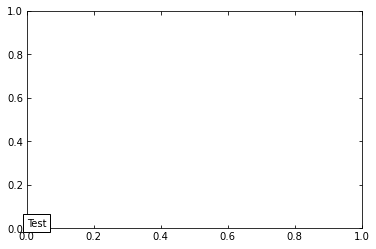

In [40]:
figt, axt = plt.subplots()
ry, rx = 0.4, 0.25 # 文本框的高度和宽度占比

# Annotate the 1st position with another text box ('Test')
offsetbox = TextArea("Test")

ab = AnnotationBbox(offsetbox, (0,0),
                    xybox=(0,0),
                    xycoords='axes fraction',
                    boxcoords="axes fraction",
                    pad=0.4,
                    box_alignment=(0,0))

axt.add_artist(ab)

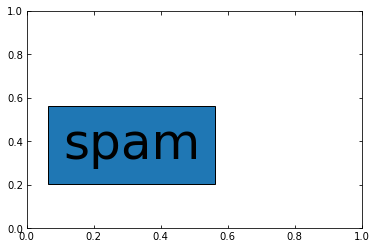

In [68]:
import matplotlib.pyplot as plt

plt.text(0, 0, "spam", size=50, transform=ax.transAxes,
         ha="left", va="bottom",
         bbox=dict(boxstyle="square"
                   )
         )

plt.show()

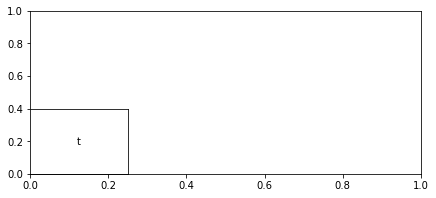

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


fig, ax = plt.subplots(figsize=[7,3])
# axins2 = inset_axes(ax, width="25%", height="40.0%", loc=3,borderpad=0)
# axins2.tick_params(labelleft=False, labelbottom=False, length=0)
# axins2.text(0.5,0.5,'test',va='center', ha='center')
inset_plot(0.25,0.4,'t',10,ax)
plt.show()

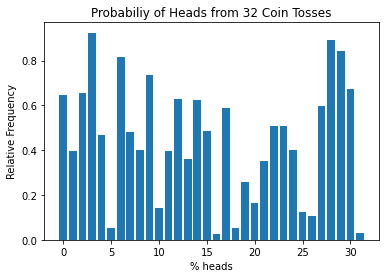

In [4]:
import random
import matplotlib.pyplot as plt

x = range(32)
y=[random.uniform(0,1) for p in range(32)]

plt.bar(x,y,align='center') # A bar chart
plt.title('Probabiliy of Heads from 32 Coin Tosses')
plt.xlabel('% heads')
plt.ylabel('Relative Frequency')
plt.show()

50.0%
